# Obsessed with Boba? Analyzing Bubble Tea Shops in NYC Using the Yelp Fusion API
Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from PIL import Image

%matplotlib inline
sns.set(color_codes=True)

In [2]:
# read in data and preview first five rows
df = pd.read_csv('boba-nyc.csv')

df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,latitude,longitude,geometry
0,Q3fmTHT7zilDWtfzLK9lMA,truedan-new-york-3,Truedan,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,False,https://www.yelp.com/biz/truedan-new-york-3?ad...,99,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7191742, 'longitude': -73.9962...","['delivery', 'pickup']",$$,"{'address1': '208 Grand St', 'address2': None,...",1.646559e+10,(646) 559-2886,1535.241614,40.719174,-73.996220,POINT (-73.9962197 40.7191742)
1,7-bx74TooPuZKZDNW4WFcQ,chun-yang-tea-new-york,Chun Yang Tea,https://s3-media1.fl.yelpcdn.com/bphoto/JrGwrZ...,False,https://www.yelp.com/biz/chun-yang-tea-new-yor...,91,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.71617, 'longitude': -73.9971}","['delivery', 'pickup']",$$,"{'address1': '26B Elizabeth St', 'address2': '...",1.212420e+10,(212) 420-0123,1212.877370,40.716170,-73.997100,POINT (-73.9971 40.71617)
2,3aypSFXLfkAL4dhHVFobKg,lazy-sundaes-new-york-6,Lazy Sundaes,https://s3-media3.fl.yelpcdn.com/bphoto/kEfCYC...,False,https://www.yelp.com/biz/lazy-sundaes-new-york...,32,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.720597, 'longitude': -73.984539}","['delivery', 'pickup']",$$,"{'address1': '23 Clinton St', 'address2': None...",NaN,NaN,1877.016204,40.720597,-73.984539,POINT (-73.984539 40.720597)
3,bVJQEeRNi34-3XN_F1AZEg,xing-fu-tang-new-york,Xing Fu Tang,https://s3-media2.fl.yelpcdn.com/bphoto/cyFHFE...,False,https://www.yelp.com/biz/xing-fu-tang-new-york...,89,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7288, 'longitude': -73.98775}","['delivery', 'pickup']",NaN,"{'address1': '133 2nd Ave', 'address2': '', 'a...",NaN,NaN,2656.450427,40.728800,-73.987750,POINT (-73.98775000000001 40.7288)
4,zupVwJAFYkHDwrsQd2ktXA,fiftylan-union-square-new-york-3,FIFTYLAN Union Square,https://s3-media3.fl.yelpcdn.com/bphoto/UIwR20...,False,https://www.yelp.com/biz/fiftylan-union-square...,59,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.0,"{'latitude': 40.735516, 'longitude': -73.989191}","['delivery', 'pickup']",NaN,"{'address1': '32 Union Square E', 'address2': ...",1.646767e+10,(646) 767-0085,3367.900728,40.735516,-73.989191,POINT (-73.98919100000001 40.735516)


In [3]:
# preview last five rows
df.tail()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,latitude,longitude,geometry
408,QBebLBqhiuDlWasPgp6s4Q,tbaar-flushing-5,Tbaar,https://s3-media1.fl.yelpcdn.com/bphoto/bgao-b...,False,https://www.yelp.com/biz/tbaar-flushing-5?adju...,2,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",3.5,"{'latitude': 40.759357, 'longitude': -73.830396}","['delivery', 'pickup']",NaN,"{'address1': '135-52 Roosevelt Ave', 'address2...",NaN,NaN,15054.917573,40.759357,-73.830396,POINT (-73.83039599999999 40.759357)
409,7apqk24GsFC9dptoD5dDZg,uncleman-cafe-new-york,Uncleman Cafe,NaN,False,https://www.yelp.com/biz/uncleman-cafe-new-yor...,1,"[{'alias': 'desserts', 'title': 'Desserts'}, {...",1.0,"{'latitude': 40.71781, 'longitude': -73.99795}",[],NaN,"{'address1': '122 Mulberry St', 'address2': No...",1.212967e+10,(212) 966-6206,1414.238245,40.717810,-73.997950,POINT (-73.99795 40.71781)
410,Vz6hbICqQfyMWq9wzAKakw,tbaar-flushing-4,TBaar,https://s3-media1.fl.yelpcdn.com/bphoto/phUYWa...,False,https://www.yelp.com/biz/tbaar-flushing-4?adju...,6,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.0,"{'latitude': 40.7613116, 'longitude': -73.8308...",[],NaN,"{'address1': '37-11 Main St', 'address2': '', ...",NaN,NaN,15147.410738,40.761312,-73.830812,POINT (-73.8308122 40.7613116)
411,YBgAPbviWYtVP2gAUhc7_A,t-baar-flushing,T Baar,https://s3-media4.fl.yelpcdn.com/bphoto/8pk-_Q...,False,https://www.yelp.com/biz/t-baar-flushing?adjus...,8,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",3.5,"{'latitude': 40.7587509, 'longitude': -73.830162}",[],$,"{'address1': '135-36 40th Rd', 'address2': '',...",NaN,NaN,15045.970192,40.758751,-73.830162,POINT (-73.830162 40.7587509)
412,f5UVQXvDpOrrIZdCjsw47w,maxins-cafe-flushing,Maxin's Cafe,https://s3-media1.fl.yelpcdn.com/bphoto/S3vWvD...,False,https://www.yelp.com/biz/maxins-cafe-flushing?...,15,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",3.5,"{'latitude': 40.7585, 'longitude': -73.83064}",[],$,"{'address1': '135-24 40th Rd', 'address2': '',...",1.718887e+10,(718) 886-9200,14997.842205,40.758500,-73.830640,POINT (-73.83064 40.7585)


In [4]:
rows, columns = df.shape
print('number of rows: {}\nnumber of columns: {}'.format(rows, columns))

number of rows: 413
number of columns: 19


In [5]:
# review concise summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             413 non-null    object 
 1   alias          413 non-null    object 
 2   name           413 non-null    object 
 3   image_url      408 non-null    object 
 4   is_closed      413 non-null    bool   
 5   url            413 non-null    object 
 6   review_count   413 non-null    int64  
 7   categories     413 non-null    object 
 8   rating         413 non-null    float64
 9   coordinates    413 non-null    object 
 10  transactions   413 non-null    object 
 11  price          258 non-null    object 
 12  location       413 non-null    object 
 13  phone          363 non-null    float64
 14  display_phone  363 non-null    object 
 15  distance       413 non-null    float64
 16  latitude       413 non-null    float64
 17  longitude      413 non-null    float64
 18  geometry  

In [6]:
# identifiying number of nulls and percentage of total per column
ser1 = df.isnull().sum().sort_values(ascending=False)
ser2 = round((df.isnull().sum().sort_values(ascending=False) / len(df)) * 100, 2)

pd.concat([ser1.rename('null_count'), ser2.rename('null_perc')], axis=1)

,null_count,null_perc
price,155,37.53
display_phone,50,12.11
phone,50,12.11
image_url,5,1.21
id,0,0.00
transactions,0,0.00
longitude,0,0.00
latitude,0,0.00
distance,0,0.00
location,0,0.00


In [7]:
# descriptive statistics of numeric columns
df.describe()

,review_count,rating,phone,distance,latitude,longitude
count,413.000000,413.000000,3.630000e+02,413.000000,413.000000,413.000000
mean,90.784504,3.991525,1.615045e+10,8865.304351,40.716352,-73.943407
std,117.238138,0.605838,2.382773e+09,5580.328072,0.058112,0.082408
min,1.000000,1.000000,1.201432e+10,953.875131,40.537609,-74.166080
25%,16.000000,3.500000,1.347732e+10,3944.470714,40.689812,-73.994960
50%,50.000000,4.000000,1.718293e+10,8155.616841,40.731610,-73.974950
75%,117.000000,4.500000,1.718887e+10,12773.346149,40.757323,-73.882745
max,740.000000,5.000000,1.934235e+10,25132.157979,40.886959,-73.702410


In [8]:
# descriptive statistics of string/object columns
df.describe(include=['O']).T

,count,unique,top,freq
id,413,413,BNyT4ticLRnaE6SF6HTAiQ,1
alias,413,413,one-more-charm-brooklyn,1
name,413,269,Kung Fu Tea,26
image_url,408,408,https://s3-media2.fl.yelpcdn.com/bphoto/HF0y5Y...,1
url,413,413,https://www.yelp.com/biz/kung-fu-tea-brooklyn-...,1
categories,413,177,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",114
coordinates,413,408,"{'latitude': 40.73161, 'longitude': -74.00312}",2
transactions,413,5,"['delivery', 'pickup']",212
price,258,3,$,168
location,413,410,"{'address1': '136-20 Roosevelt Ave', 'address2...",2


In [9]:
# confirm that unique id is actually unique
print('id is unique: {}'.format(df['id'].is_unique))

id is unique: True


In [10]:
df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,latitude,longitude,geometry
0,Q3fmTHT7zilDWtfzLK9lMA,truedan-new-york-3,Truedan,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,False,https://www.yelp.com/biz/truedan-new-york-3?ad...,99,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7191742, 'longitude': -73.9962...","['delivery', 'pickup']",$$,"{'address1': '208 Grand St', 'address2': None,...",1.646559e+10,(646) 559-2886,1535.241614,40.719174,-73.996220,POINT (-73.9962197 40.7191742)
1,7-bx74TooPuZKZDNW4WFcQ,chun-yang-tea-new-york,Chun Yang Tea,https://s3-media1.fl.yelpcdn.com/bphoto/JrGwrZ...,False,https://www.yelp.com/biz/chun-yang-tea-new-yor...,91,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.71617, 'longitude': -73.9971}","['delivery', 'pickup']",$$,"{'address1': '26B Elizabeth St', 'address2': '...",1.212420e+10,(212) 420-0123,1212.877370,40.716170,-73.997100,POINT (-73.9971 40.71617)
2,3aypSFXLfkAL4dhHVFobKg,lazy-sundaes-new-york-6,Lazy Sundaes,https://s3-media3.fl.yelpcdn.com/bphoto/kEfCYC...,False,https://www.yelp.com/biz/lazy-sundaes-new-york...,32,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.720597, 'longitude': -73.984539}","['delivery', 'pickup']",$$,"{'address1': '23 Clinton St', 'address2': None...",NaN,NaN,1877.016204,40.720597,-73.984539,POINT (-73.984539 40.720597)
3,bVJQEeRNi34-3XN_F1AZEg,xing-fu-tang-new-york,Xing Fu Tang,https://s3-media2.fl.yelpcdn.com/bphoto/cyFHFE...,False,https://www.yelp.com/biz/xing-fu-tang-new-york...,89,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7288, 'longitude': -73.98775}","['delivery', 'pickup']",NaN,"{'address1': '133 2nd Ave', 'address2': '', 'a...",NaN,NaN,2656.450427,40.728800,-73.987750,POINT (-73.98775000000001 40.7288)
4,zupVwJAFYkHDwrsQd2ktXA,fiftylan-union-square-new-york-3,FIFTYLAN Union Square,https://s3-media3.fl.yelpcdn.com/bphoto/UIwR20...,False,https://www.yelp.com/biz/fiftylan-union-square...,59,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.0,"{'latitude': 40.735516, 'longitude': -73.989191}","['delivery', 'pickup']",NaN,"{'address1': '32 Union Square E', 'address2': ...",1.646767e+10,(646) 767-0085,3367.900728,40.735516,-73.989191,POINT (-73.98919100000001 40.735516)


In [11]:
# identify number of unique bubble tea shop entries
names_counts = df['name'].value_counts().reset_index()
names_counts = names_counts.rename(columns={'index':'name', 'name':'counts'})

print('number of unique bubble tea shops: {}'.format(len(names_counts)))
names_counts

number of unique bubble tea shops: 269


,name,counts
0,Kung Fu Tea,26
1,Gong Cha,24
2,ViVi Bubble Tea,19
3,Möge Tee,9
4,CoCo Fresh Tea & Juice,6
...,...,...
264,ViVi Bubble tea,1
265,Creep City Ninja Bubble Tea,1
266,Newkirk Fruit,1
267,Sakai Ramen,1


In [12]:
# check for duplicates - white spaces, mispellings, etc
lst = []
for row in range(len(names_counts)):
    value = names_counts['name'][row].replace(' ', '').lower()
    lst.append(value)  
    
names_counts = pd.concat([names_counts, pd.Series(lst).rename('name_lower')], axis=1)
names_counts.head()    

,name,counts,name_lower
0,Kung Fu Tea,26,kungfutea
1,Gong Cha,24,gongcha
2,ViVi Bubble Tea,19,vivibubbletea
3,Möge Tee,9,mögetee
4,CoCo Fresh Tea & Juice,6,cocofreshtea&juice


In [13]:
# there are duplicate entries
names_counts['name_lower'].value_counts().head(10)

jooyteashoppe           3
tbaar                   3
vivibubbletea           3
yifangtaiwanfruittea    3
yomie'sricexyogurt      2
pokébowlstation         2
cocofreshtea&juice      2
theyuniquetea           1
goodyfreshdimsum        1
unclemancafe            1
Name: name_lower, dtype: int64

In [14]:
# return list of duplicate entries that need to be replaced
duplicates_ser = names_counts['name_lower'].value_counts() > 1
duplicates = duplicates_ser.loc[duplicates_ser].index

duplicates.to_list()

['jooyteashoppe',
 'tbaar',
 'vivibubbletea',
 'yifangtaiwanfruittea',
 "yomie'sricexyogurt",
 'pokébowlstation',
 'cocofreshtea&juice']

In [15]:
names_counts = names_counts.loc[names_counts['name_lower'].isin(duplicates.to_list())].sort_values(by='name_lower')

names_counts

,name,counts,name_lower
4,CoCo Fresh Tea & Juice,6,cocofreshtea&juice
7,Coco Fresh Tea & Juice,4,cocofreshtea&juice
152,JOOY TEA SHOPPE,1,jooyteashoppe
125,JOOY Tea Shoppe,1,jooyteashoppe
70,Jooy Tea Shoppe,1,jooyteashoppe
32,PokéBowl Station,2,pokébowlstation
235,Pokébowl Station,1,pokébowlstation
8,TBaar,4,tbaar
16,Tbaar,3,tbaar
126,T Baar,1,tbaar


In [16]:
# a dictionary of formatted names (lower & remove white spice) and new names to be returned
new_names = {'yifangtaiwanfruittea':'Yi Fang Taiwan Fruit Tea',
             'vivibubbletea':'Vivi Bubble Tea',
             'jooyteashoppe':'JOOY Tea Shop',
             'tbaar':'TBaar',
             'cocofreshtea&juice':'CoCo Fresh Tea & Juice',
             "yomie'sricexyogurt":"Yomie's Rice X Yogurt",
             'pokébowlstation':'PokéBowl Station'}

names_counts['name_lower'] = names_counts['name_lower'].replace(new_names)

names_counts

,name,counts,name_lower
4,CoCo Fresh Tea & Juice,6,CoCo Fresh Tea & Juice
7,Coco Fresh Tea & Juice,4,CoCo Fresh Tea & Juice
152,JOOY TEA SHOPPE,1,JOOY Tea Shop
125,JOOY Tea Shoppe,1,JOOY Tea Shop
70,Jooy Tea Shoppe,1,JOOY Tea Shop
32,PokéBowl Station,2,PokéBowl Station
235,Pokébowl Station,1,PokéBowl Station
8,TBaar,4,TBaar
16,Tbaar,3,TBaar
126,T Baar,1,TBaar


In [17]:
# a dictionary of old and new names to be returned
replace_duplicates = dict(zip(names_counts['name'], names_counts['name_lower']))

replace_duplicates

{'CoCo Fresh Tea & Juice': 'CoCo Fresh Tea & Juice',
 'Coco Fresh Tea & Juice': 'CoCo Fresh Tea & Juice',
 'JOOY TEA SHOPPE': 'JOOY Tea Shop',
 'JOOY Tea Shoppe': 'JOOY Tea Shop',
 'Jooy Tea Shoppe': 'JOOY Tea Shop',
 'PokéBowl Station': 'PokéBowl Station',
 'Pokébowl Station': 'PokéBowl Station',
 'TBaar': 'TBaar',
 'Tbaar': 'TBaar',
 'T Baar': 'TBaar',
 'ViVi Bubble Tea': 'Vivi Bubble Tea',
 'ViVi Bubble tea': 'Vivi Bubble Tea',
 'Vivi Bubble Tea': 'Vivi Bubble Tea',
 'Yi Fang Taiwan Fruit Tea': 'Yi Fang Taiwan Fruit Tea',
 'Yifang Taiwan Fruit Tea': 'Yi Fang Taiwan Fruit Tea',
 'YiFang Taiwan Fruit Tea': 'Yi Fang Taiwan Fruit Tea',
 "Yomie's Rice x Yogurt": "Yomie's Rice X Yogurt",
 "Yomie's Rice X Yogurt": "Yomie's Rice X Yogurt"}

In [18]:
# replace old and new names to original dataframe
df['name'] = df['name'].replace(replace_duplicates)

df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,latitude,longitude,geometry
0,Q3fmTHT7zilDWtfzLK9lMA,truedan-new-york-3,Truedan,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,False,https://www.yelp.com/biz/truedan-new-york-3?ad...,99,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7191742, 'longitude': -73.9962...","['delivery', 'pickup']",$$,"{'address1': '208 Grand St', 'address2': None,...",1.646559e+10,(646) 559-2886,1535.241614,40.719174,-73.996220,POINT (-73.9962197 40.7191742)
1,7-bx74TooPuZKZDNW4WFcQ,chun-yang-tea-new-york,Chun Yang Tea,https://s3-media1.fl.yelpcdn.com/bphoto/JrGwrZ...,False,https://www.yelp.com/biz/chun-yang-tea-new-yor...,91,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.71617, 'longitude': -73.9971}","['delivery', 'pickup']",$$,"{'address1': '26B Elizabeth St', 'address2': '...",1.212420e+10,(212) 420-0123,1212.877370,40.716170,-73.997100,POINT (-73.9971 40.71617)
2,3aypSFXLfkAL4dhHVFobKg,lazy-sundaes-new-york-6,Lazy Sundaes,https://s3-media3.fl.yelpcdn.com/bphoto/kEfCYC...,False,https://www.yelp.com/biz/lazy-sundaes-new-york...,32,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.720597, 'longitude': -73.984539}","['delivery', 'pickup']",$$,"{'address1': '23 Clinton St', 'address2': None...",NaN,NaN,1877.016204,40.720597,-73.984539,POINT (-73.984539 40.720597)
3,bVJQEeRNi34-3XN_F1AZEg,xing-fu-tang-new-york,Xing Fu Tang,https://s3-media2.fl.yelpcdn.com/bphoto/cyFHFE...,False,https://www.yelp.com/biz/xing-fu-tang-new-york...,89,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7288, 'longitude': -73.98775}","['delivery', 'pickup']",NaN,"{'address1': '133 2nd Ave', 'address2': '', 'a...",NaN,NaN,2656.450427,40.728800,-73.987750,POINT (-73.98775000000001 40.7288)
4,zupVwJAFYkHDwrsQd2ktXA,fiftylan-union-square-new-york-3,FIFTYLAN Union Square,https://s3-media3.fl.yelpcdn.com/bphoto/UIwR20...,False,https://www.yelp.com/biz/fiftylan-union-square...,59,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.0,"{'latitude': 40.735516, 'longitude': -73.989191}","['delivery', 'pickup']",NaN,"{'address1': '32 Union Square E', 'address2': ...",1.646767e+10,(646) 767-0085,3367.900728,40.735516,-73.989191,POINT (-73.98919100000001 40.735516)


In [19]:
df.to_csv('boba-nyc-cleaned.csv', index=False)

In [20]:
# count of unique values of bubble tea shops
df['name'].value_counts()

Kung Fu Tea                    26
Vivi Bubble Tea                25
Gong Cha                       24
CoCo Fresh Tea & Juice         10
Möge Tee                        9
                               ..
Honestea                        1
Mochinut Bayside                1
Creep City Ninja Bubble Tea     1
Newkirk Fruit                   1
Boba Fries                      1
Name: name, Length: 258, dtype: int64

In [21]:
df['name'].value_counts().reset_index(drop=False)

,index,name
0,Kung Fu Tea,26
1,Vivi Bubble Tea,25
2,Gong Cha,24
3,CoCo Fresh Tea & Juice,10
4,Möge Tee,9
...,...,...
253,Honestea,1
254,Mochinut Bayside,1
255,Creep City Ninja Bubble Tea,1
256,Newkirk Fruit,1


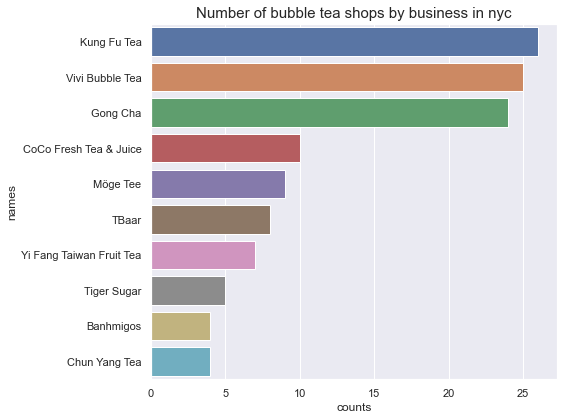

In [22]:
names_counts = df['name'].value_counts().reset_index(drop=False)
names_counts = names_counts.rename(columns={'index':'names', 'name':'counts'})

fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(x='counts',
            y="names", 
            data=names_counts.head(10), 
            ax=ax)

plt.title('Number of bubble tea shops by business in nyc', fontsize=15)
plt.tight_layout()

In [23]:
review_count_df = df.groupby(by='name')['review_count'].mean().sort_values(ascending=False)
review_count_df = round(review_count_df, 2)
review_count_df = review_count_df.reset_index()

review_count_df.head()

,name,review_count
0,Ten Ren's Tea Time,655.00
1,Hanco's,519.33
2,Ajisen Ramen,438.00
3,Teado Tea Shop,426.00
4,520 Dessert,358.00


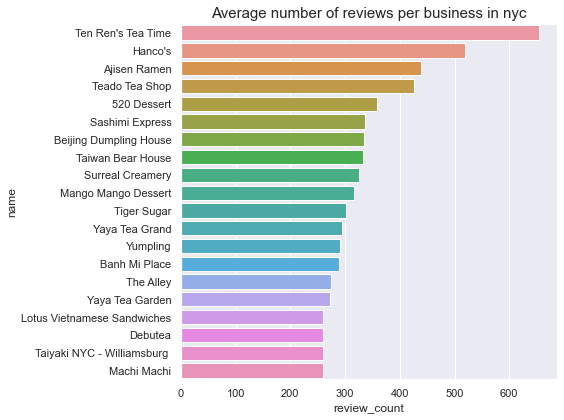

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(x="review_count", 
            y="name", 
            data=review_count_df.head(20), 
            ax=ax)

plt.title('Average number of reviews per business in nyc', fontsize=15)
plt.tight_layout()

In [25]:
most_reviewed = df.sort_values(by='review_count', ascending=False).head(20)

most_reviewed.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,latitude,longitude,geometry
170,bn0zZ9nT_j1INOwfpxWmEw,tiger-sugar-flushing,Tiger Sugar,https://s3-media3.fl.yelpcdn.com/bphoto/Psre6b...,False,https://www.yelp.com/biz/tiger-sugar-flushing?...,740,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.0,"{'latitude': 40.75922023369396, 'longitude': -...","['pickup', 'delivery']",$$,"{'address1': '40-10 Main St', 'address2': 'Ste...",1.347732e+10,(347) 732-4001,15055.920826,40.759220,-73.830305,POINT (-73.83030496537685 40.75922023369396)
88,NqnYnZtajJ4Y-Lmxa26VdA,hancos-brooklyn,Hanco's,https://s3-media3.fl.yelpcdn.com/bphoto/_vQWWX...,False,https://www.yelp.com/biz/hancos-brooklyn?adjus...,705,"[{'alias': 'vietnamese', 'title': 'Vietnamese'...",4.0,"{'latitude': 40.6870318621828, 'longitude': -7...","['delivery', 'pickup']",$,"{'address1': '134 Smith St', 'address2': '', '...",1.718859e+10,(718) 858-6818,2073.182530,40.687032,-73.990429,POINT (-73.9904292380982 40.6870318621828)
50,WxNlqGSsj_2TCodkx9Sa4A,vivi-bubble-tea-new-york-6,Vivi Bubble Tea,https://s3-media2.fl.yelpcdn.com/bphoto/Fw3SYB...,False,https://www.yelp.com/biz/vivi-bubble-tea-new-y...,658,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.0,"{'latitude': 40.715099, 'longitude': -73.997535}","['delivery', 'pickup']",$,"{'address1': '49 Bayard St', 'address2': '', '...",1.212567e+10,(212) 566-6833,1114.073275,40.715099,-73.997535,POINT (-73.997535 40.715099)
45,SqVHETmH6bf3rPKmdftvvw,ten-rens-tea-time-new-york-2,Ten Ren's Tea Time,https://s3-media1.fl.yelpcdn.com/bphoto/UChdn5...,False,https://www.yelp.com/biz/ten-rens-tea-time-new...,655,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.0,"{'latitude': 40.7163819, 'longitude': -73.9982...",['delivery'],$$,"{'address1': '73 Mott St', 'address2': '', 'ad...",1.212733e+10,(212) 732-7178,1261.450313,40.716382,-73.998268,POINT (-73.99826830000001 40.7163819)
272,ZLo3HRSSvN--Mw4eCBLxCg,mango-mango-dessert-flushing-3,Mango Mango Dessert,https://s3-media4.fl.yelpcdn.com/bphoto/9zl6pk...,False,https://www.yelp.com/biz/mango-mango-dessert-f...,620,"[{'alias': 'desserts', 'title': 'Desserts'}, {...",4.0,"{'latitude': 40.7603809317017, 'longitude': -7...","['delivery', 'pickup']",$,"{'address1': '136-28 39th Ave', 'address2': ''...",1.917563e+10,(917) 563-1847,15199.500511,40.760381,-73.829452,POINT (-73.8294516357502 40.7603809317017)


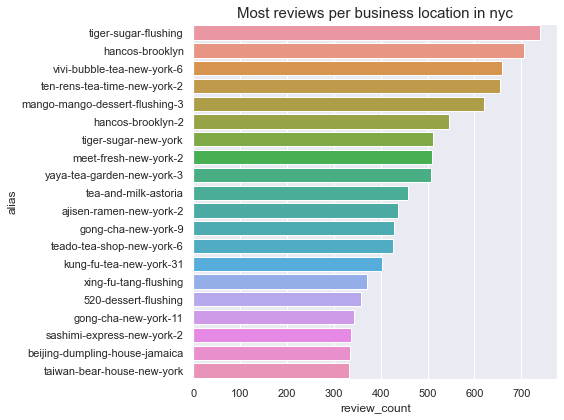

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(x="review_count", 
            y="alias", 
            data=most_reviewed, 
            ax=ax)

plt.title('Most reviews per business location in nyc', fontsize=15)
plt.tight_layout()

In [27]:
df['rating'].describe()

count    413.000000
mean       3.991525
std        0.605838
min        1.000000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: rating, dtype: float64

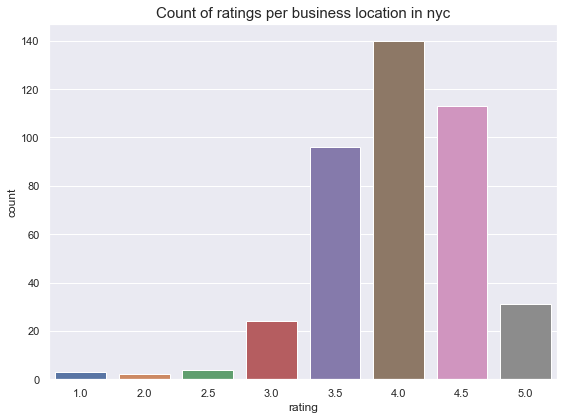

In [28]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.countplot(data=df, 
             x="rating")

plt.title('Count of ratings per business location in nyc', fontsize=15)
plt.tight_layout()

In [29]:
price_df = df['price'].dropna().value_counts()
price_df = price_df.reset_index()
price_df.columns = ['price', 'counts']

price_df

,price,counts
0,$,168
1,$$,89
2,$$$$,1


In [30]:
price_df['price'] = price_df['price'].str.count('\\$')

price_df

,price,counts
0,1,168
1,2,89
2,4,1


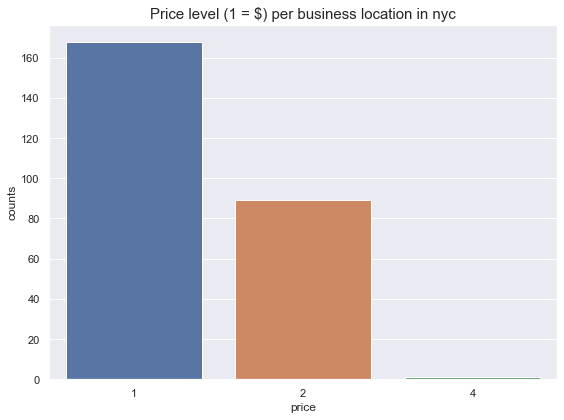

In [31]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(y="counts", 
            x="price", 
            data=price_df, 
            ax=ax)

plt.title('Price level (1 = $) per business location in NYC', fontsize=15)
plt.tight_layout()

In [32]:
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=Shapefile'
neighborhoods = gpd.read_file(url)

neighborhoods.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry
0,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904856,"POLYGON ((-73.80379 40.77561, -73.80099 40.775..."
1,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.711894,"POLYGON ((-73.86110 40.76366, -73.85993 40.762..."
2,4.0,Queens,081,QN41,Fresh Meadows-Utopia,2.777485e+07,22106.431272,"POLYGON ((-73.77758 40.73019, -73.77849 40.729..."
3,1.0,Manhattan,061,MN17,Midtown-Midtown South,3.019153e+07,27032.700375,"POLYGON ((-73.97301 40.76428, -73.97141 40.763..."
4,2.0,Bronx,005,BX09,Soundview-Castle Hill-Clason Point-Harding Park,5.198380e+07,67340.977626,"MULTIPOLYGON (((-73.88064 40.81852, -73.88098 ..."


In [33]:
neighborhoods.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [34]:
neighborhoods = neighborhoods.to_crs('EPSG:4326')

neighborhoods.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [35]:
df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,latitude,longitude,geometry
0,Q3fmTHT7zilDWtfzLK9lMA,truedan-new-york-3,Truedan,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,False,https://www.yelp.com/biz/truedan-new-york-3?ad...,99,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7191742, 'longitude': -73.9962...","['delivery', 'pickup']",$$,"{'address1': '208 Grand St', 'address2': None,...",1.646559e+10,(646) 559-2886,1535.241614,40.719174,-73.996220,POINT (-73.9962197 40.7191742)
1,7-bx74TooPuZKZDNW4WFcQ,chun-yang-tea-new-york,Chun Yang Tea,https://s3-media1.fl.yelpcdn.com/bphoto/JrGwrZ...,False,https://www.yelp.com/biz/chun-yang-tea-new-yor...,91,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.71617, 'longitude': -73.9971}","['delivery', 'pickup']",$$,"{'address1': '26B Elizabeth St', 'address2': '...",1.212420e+10,(212) 420-0123,1212.877370,40.716170,-73.997100,POINT (-73.9971 40.71617)
2,3aypSFXLfkAL4dhHVFobKg,lazy-sundaes-new-york-6,Lazy Sundaes,https://s3-media3.fl.yelpcdn.com/bphoto/kEfCYC...,False,https://www.yelp.com/biz/lazy-sundaes-new-york...,32,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.720597, 'longitude': -73.984539}","['delivery', 'pickup']",$$,"{'address1': '23 Clinton St', 'address2': None...",NaN,NaN,1877.016204,40.720597,-73.984539,POINT (-73.984539 40.720597)
3,bVJQEeRNi34-3XN_F1AZEg,xing-fu-tang-new-york,Xing Fu Tang,https://s3-media2.fl.yelpcdn.com/bphoto/cyFHFE...,False,https://www.yelp.com/biz/xing-fu-tang-new-york...,89,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7288, 'longitude': -73.98775}","['delivery', 'pickup']",NaN,"{'address1': '133 2nd Ave', 'address2': '', 'a...",NaN,NaN,2656.450427,40.728800,-73.987750,POINT (-73.98775000000001 40.7288)
4,zupVwJAFYkHDwrsQd2ktXA,fiftylan-union-square-new-york-3,FIFTYLAN Union Square,https://s3-media3.fl.yelpcdn.com/bphoto/UIwR20...,False,https://www.yelp.com/biz/fiftylan-union-square...,59,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.0,"{'latitude': 40.735516, 'longitude': -73.989191}","['delivery', 'pickup']",NaN,"{'address1': '32 Union Square E', 'address2': ...",1.646767e+10,(646) 767-0085,3367.900728,40.735516,-73.989191,POINT (-73.98919100000001 40.735516)


In [36]:
gdf = gpd.GeoDataFrame(df, crs=4326,
      geometry=gpd.points_from_xy(df.longitude, df.latitude))

gdf.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,latitude,longitude,geometry
0,Q3fmTHT7zilDWtfzLK9lMA,truedan-new-york-3,Truedan,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,False,https://www.yelp.com/biz/truedan-new-york-3?ad...,99,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7191742, 'longitude': -73.9962...","['delivery', 'pickup']",$$,"{'address1': '208 Grand St', 'address2': None,...",1.646559e+10,(646) 559-2886,1535.241614,40.719174,-73.996220,POINT (-73.99622 40.71917)
1,7-bx74TooPuZKZDNW4WFcQ,chun-yang-tea-new-york,Chun Yang Tea,https://s3-media1.fl.yelpcdn.com/bphoto/JrGwrZ...,False,https://www.yelp.com/biz/chun-yang-tea-new-yor...,91,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.71617, 'longitude': -73.9971}","['delivery', 'pickup']",$$,"{'address1': '26B Elizabeth St', 'address2': '...",1.212420e+10,(212) 420-0123,1212.877370,40.716170,-73.997100,POINT (-73.99710 40.71617)
2,3aypSFXLfkAL4dhHVFobKg,lazy-sundaes-new-york-6,Lazy Sundaes,https://s3-media3.fl.yelpcdn.com/bphoto/kEfCYC...,False,https://www.yelp.com/biz/lazy-sundaes-new-york...,32,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.720597, 'longitude': -73.984539}","['delivery', 'pickup']",$$,"{'address1': '23 Clinton St', 'address2': None...",NaN,NaN,1877.016204,40.720597,-73.984539,POINT (-73.98454 40.72060)
3,bVJQEeRNi34-3XN_F1AZEg,xing-fu-tang-new-york,Xing Fu Tang,https://s3-media2.fl.yelpcdn.com/bphoto/cyFHFE...,False,https://www.yelp.com/biz/xing-fu-tang-new-york...,89,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7288, 'longitude': -73.98775}","['delivery', 'pickup']",NaN,"{'address1': '133 2nd Ave', 'address2': '', 'a...",NaN,NaN,2656.450427,40.728800,-73.987750,POINT (-73.98775 40.72880)
4,zupVwJAFYkHDwrsQd2ktXA,fiftylan-union-square-new-york-3,FIFTYLAN Union Square,https://s3-media3.fl.yelpcdn.com/bphoto/UIwR20...,False,https://www.yelp.com/biz/fiftylan-union-square...,59,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.0,"{'latitude': 40.735516, 'longitude': -73.989191}","['delivery', 'pickup']",NaN,"{'address1': '32 Union Square E', 'address2': ...",1.646767e+10,(646) 767-0085,3367.900728,40.735516,-73.989191,POINT (-73.98919 40.73552)


In [37]:
join_df = gpd.sjoin(gdf, 
                    neighborhoods, 
                    op='intersects') 

join_df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,...,longitude,geometry,index_right,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng
0,Q3fmTHT7zilDWtfzLK9lMA,truedan-new-york-3,Truedan,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,False,https://www.yelp.com/biz/truedan-new-york-3?ad...,99,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7191742, 'longitude': -73.9962...",...,-73.996220,POINT (-73.99622 40.71917),94,1.0,Manhattan,061,MN24,SoHo-TriBeCa-Civic Center-Little Italy,2.503268e+07,26855.031527
15,DbhBca8LzskjS0B-L4QfZg,tiger-sugar-new-york,Tiger Sugar,https://s3-media3.fl.yelpcdn.com/bphoto/5wNVyj...,False,https://www.yelp.com/biz/tiger-sugar-new-york?...,512,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.0,"{'latitude': 40.717891007822274, 'longitude': ...",...,-73.999780,POINT (-73.99978 40.71789),94,1.0,Manhattan,061,MN24,SoHo-TriBeCa-Civic Center-Little Italy,2.503268e+07,26855.031527
28,bxCjNLVDQggNTbpviV0RMw,lazy-sundaes-new-york-4,Lazy Sundaes,https://s3-media3.fl.yelpcdn.com/bphoto/iDul5E...,False,https://www.yelp.com/biz/lazy-sundaes-new-york...,65,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.0,"{'latitude': 40.7189689, 'longitude': -74.0006...",...,-74.000677,POINT (-74.00068 40.71897),94,1.0,Manhattan,061,MN24,SoHo-TriBeCa-Civic Center-Little Italy,2.503268e+07,26855.031527
60,jsJdz6pvyYZjtut9vkUwBw,yaya-tea-grand-new-york-2,Yaya Tea Grand,https://s3-media2.fl.yelpcdn.com/bphoto/iutBCc...,False,https://www.yelp.com/biz/yaya-tea-grand-new-yo...,295,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.0,"{'latitude': 40.7192268371582, 'longitude': -7...",...,-73.996277,POINT (-73.99628 40.71923),94,1.0,Manhattan,061,MN24,SoHo-TriBeCa-Civic Center-Little Italy,2.503268e+07,26855.031527
72,uge-Lp_kY1J6Z4CzzceULw,honestea-new-york,Honestea,https://s3-media1.fl.yelpcdn.com/bphoto/77X7Xd...,False,https://www.yelp.com/biz/honestea-new-york?adj...,103,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",3.5,"{'latitude': 40.71789, 'longitude': -73.99692}",...,-73.996920,POINT (-73.99692 40.71789),94,1.0,Manhattan,061,MN24,SoHo-TriBeCa-Civic Center-Little Italy,2.503268e+07,26855.031527


In [38]:
join_df = join_df.groupby(by=['ntaname', 'shape_area'])['id'].count().sort_values(ascending=False)
join_df = join_df.reset_index()

join_df = join_df.rename(columns={'id':'counts'})
join_df['counts_squaremile'] = join_df['counts'] / 27878400

join_df.head()

,ntaname,shape_area,counts,counts_squaremile
0,Flushing,3.786424e+07,40,1.434803e-06
1,Chinatown,1.450188e+07,28,1.004362e-06
2,Sunset Park East,2.711007e+07,23,8.250115e-07
3,Hunters Point-Sunnyside-West Maspeth,1.024191e+08,19,6.815312e-07
4,Elmhurst,3.267480e+07,17,6.097911e-07


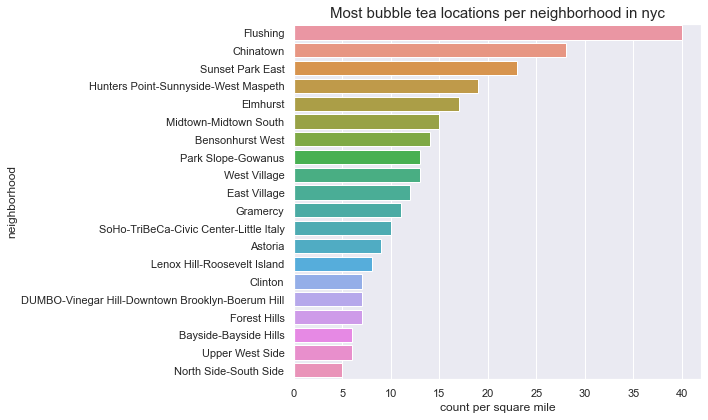

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x="counts", 
            y="ntaname", 
            data=join_df.head(20), 
            ax=ax)

plt.title('Most bubble tea locations per neighborhood in NYC', fontsize=15)
plt.ylabel('neighborhood')
plt.xlabel('count per square mile')

plt.tight_layout()
plt.savefig('busineses-per-neighborhood.png', dpi=200)

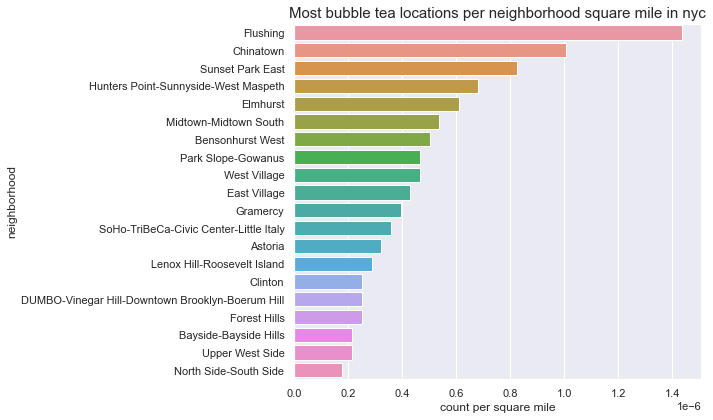

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x="counts_squaremile", 
            y="ntaname", 
            data=join_df.head(20), 
            ax=ax)

plt.title('Most bubble tea locations per neighborhood square mile in NYC', fontsize=15)
plt.ylabel('neighborhood')
plt.xlabel('count per square mile')

plt.tight_layout()
plt.savefig('busineses-per-neighborhood.png', dpi=200)